In [1]:
import cv2
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mnist import MNIST

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from keras.utils import plot_model, to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder


# loading the original MNIST hand-written digits
mndata = MNIST('')
mndata.gz = True

images, labels = mndata.load_training()

Using TensorFlow backend.


(60000, 28, 28)


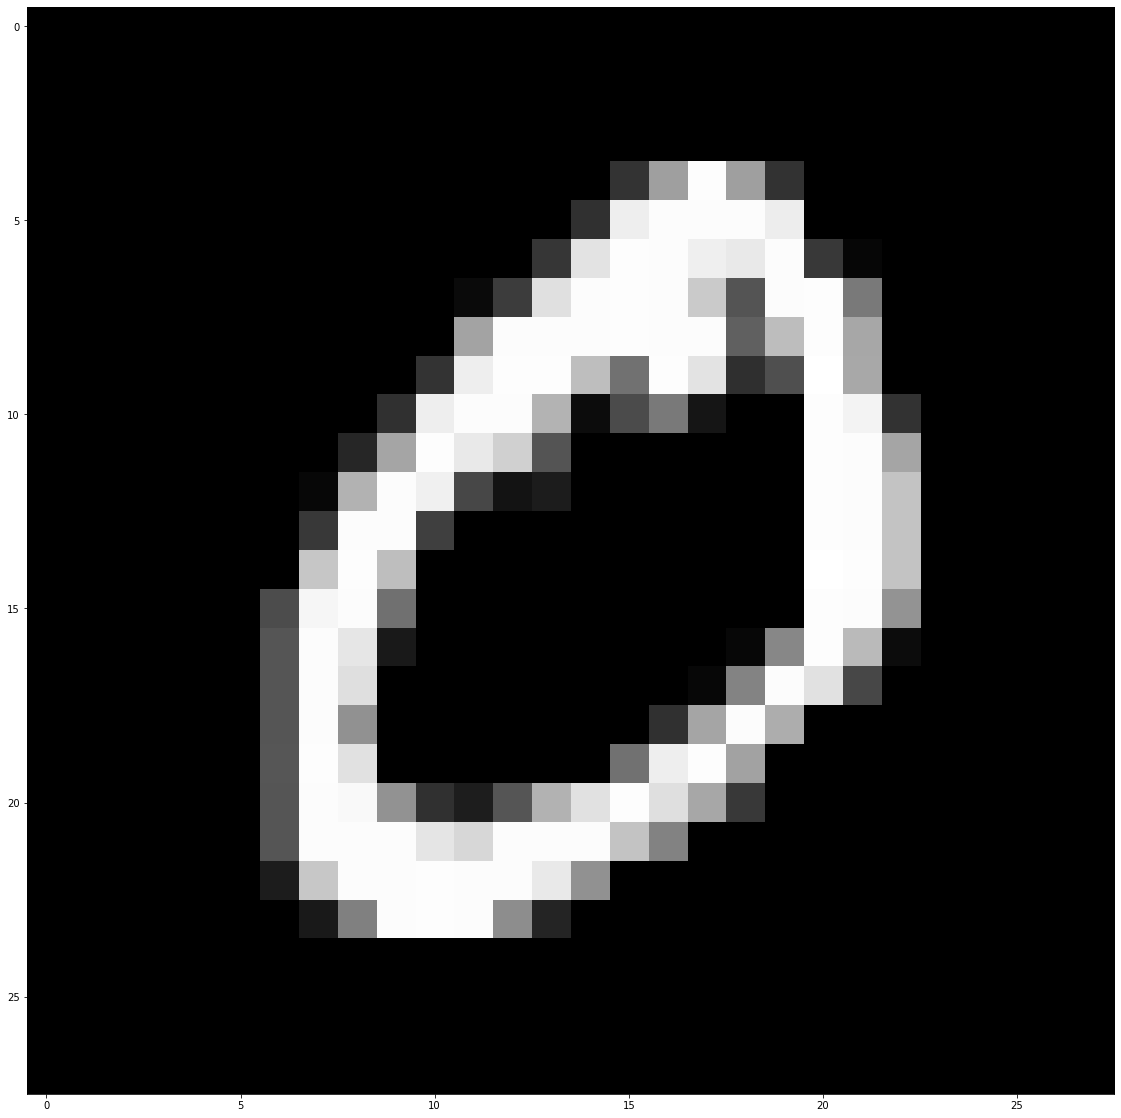

In [2]:
imgs = np.asarray(images)
imgs = np.reshape(imgs, (-1, 28, 28))
print(imgs.shape)

plt.figure(figsize = (20,20))
plt.imshow(imgs[1], cmap='gray')
plt.show()

In [3]:
def cnn_model():
    model = Sequential()

    model.add(Conv2D(14, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(28, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(784, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    opt = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

model = cnn_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 14)        140       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 14)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 28)          9828      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 28)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 28)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 448)              

In [4]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.30, random_state=0)
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

X_train = np.array(X_train).reshape(-1,28,28,1)
X_test = np.array(X_test).reshape(-1,28,28,1)

onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
y_train = onehot_encoder.fit_transform(np.reshape(y_train, (-1,1)))
y_test = onehot_encoder.transform(np.reshape(y_test, (-1,1)))

In [5]:
history = model.fit(X_train, y_train, batch_size=1000, epochs=30, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, batch_size=1000)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - ETA: 25s - loss: 2.3619 - accuracy: 0.092 - ETA: 16s - loss: 2.3268 - accuracy: 0.105 - ETA: 13s - loss: 2.2968 - accuracy: 0.134 - ETA: 11s - loss: 2.2683 - accuracy: 0.166 - ETA: 10s - loss: 2.2420 - accuracy: 0.195 - ETA: 9s - loss: 2.2137 - accuracy: 0.222 - ETA: 9s - loss: 2.1848 - accuracy: 0.24 - ETA: 8s - loss: 2.1523 - accuracy: 0.27 - ETA: 7s - loss: 2.1205 - accuracy: 0.29 - ETA: 7s - loss: 2.0849 - accuracy: 0.30 - ETA: 7s - loss: 2.0494 - accuracy: 0.32 - ETA: 6s - loss: 2.0130 - accuracy: 0.33 - ETA: 6s - loss: 1.9742 - accuracy: 0.35 - ETA: 6s - loss: 1.9328 - accuracy: 0.36 - ETA: 6s - loss: 1.8905 - accuracy: 0.38 - ETA: 5s - loss: 1.8481 - accuracy: 0.39 - ETA: 5s - loss: 1.8086 - accuracy: 0.41 - ETA: 5s - loss: 1.7679 - accuracy: 0.42 - ETA: 5s - loss: 1.7288 - accuracy: 0.43 - ETA: 4s - loss: 1.6935 - accuracy: 0.44 - ETA: 4s - loss: 1.6591 - accuracy: 0.45 -

42000/42000 [==============================] - ETA: 10s - loss: 0.2411 - accuracy: 0.923 - ETA: 11s - loss: 0.2362 - accuracy: 0.922 - ETA: 10s - loss: 0.2239 - accuracy: 0.928 - ETA: 10s - loss: 0.2302 - accuracy: 0.928 - ETA: 9s - loss: 0.2326 - accuracy: 0.930 - ETA: 9s - loss: 0.2319 - accuracy: 0.93 - ETA: 9s - loss: 0.2277 - accuracy: 0.93 - ETA: 8s - loss: 0.2259 - accuracy: 0.93 - ETA: 8s - loss: 0.2245 - accuracy: 0.93 - ETA: 8s - loss: 0.2212 - accuracy: 0.93 - ETA: 8s - loss: 0.2223 - accuracy: 0.93 - ETA: 8s - loss: 0.2231 - accuracy: 0.93 - ETA: 7s - loss: 0.2210 - accuracy: 0.93 - ETA: 7s - loss: 0.2193 - accuracy: 0.93 - ETA: 7s - loss: 0.2190 - accuracy: 0.93 - ETA: 7s - loss: 0.2184 - accuracy: 0.93 - ETA: 6s - loss: 0.2201 - accuracy: 0.93 - ETA: 6s - loss: 0.2214 - accuracy: 0.93 - ETA: 6s - loss: 0.2192 - accuracy: 0.93 - ETA: 5s - loss: 0.2183 - accuracy: 0.93 - ETA: 5s - loss: 0.2183 - accuracy: 0.93 - ETA: 5s - loss: 0.2192 - accuracy: 0.93 - ETA: 5s - loss: 0.21

42000/42000 [==============================] - ETA: 10s - loss: 0.1713 - accuracy: 0.947 - ETA: 10s - loss: 0.1821 - accuracy: 0.943 - ETA: 10s - loss: 0.1718 - accuracy: 0.944 - ETA: 9s - loss: 0.1663 - accuracy: 0.947 - ETA: 9s - loss: 0.1619 - accuracy: 0.94 - ETA: 9s - loss: 0.1630 - accuracy: 0.94 - ETA: 8s - loss: 0.1609 - accuracy: 0.94 - ETA: 8s - loss: 0.1593 - accuracy: 0.94 - ETA: 8s - loss: 0.1560 - accuracy: 0.95 - ETA: 8s - loss: 0.1512 - accuracy: 0.95 - ETA: 8s - loss: 0.1518 - accuracy: 0.95 - ETA: 8s - loss: 0.1491 - accuracy: 0.95 - ETA: 8s - loss: 0.1496 - accuracy: 0.95 - ETA: 7s - loss: 0.1494 - accuracy: 0.95 - ETA: 7s - loss: 0.1496 - accuracy: 0.95 - ETA: 7s - loss: 0.1495 - accuracy: 0.95 - ETA: 6s - loss: 0.1513 - accuracy: 0.95 - ETA: 6s - loss: 0.1541 - accuracy: 0.95 - ETA: 6s - loss: 0.1528 - accuracy: 0.95 - ETA: 5s - loss: 0.1533 - accuracy: 0.95 - ETA: 5s - loss: 0.1539 - accuracy: 0.95 - ETA: 5s - loss: 0.1528 - accuracy: 0.95 - ETA: 5s - loss: 0.1509

42000/42000 [==============================] - ETA: 11s - loss: 0.1537 - accuracy: 0.960 - ETA: 10s - loss: 0.1521 - accuracy: 0.954 - ETA: 10s - loss: 0.1439 - accuracy: 0.955 - ETA: 10s - loss: 0.1380 - accuracy: 0.954 - ETA: 10s - loss: 0.1297 - accuracy: 0.956 - ETA: 9s - loss: 0.1307 - accuracy: 0.957 - ETA: 9s - loss: 0.1295 - accuracy: 0.95 - ETA: 9s - loss: 0.1285 - accuracy: 0.95 - ETA: 9s - loss: 0.1295 - accuracy: 0.95 - ETA: 8s - loss: 0.1319 - accuracy: 0.95 - ETA: 8s - loss: 0.1297 - accuracy: 0.95 - ETA: 8s - loss: 0.1282 - accuracy: 0.95 - ETA: 8s - loss: 0.1281 - accuracy: 0.95 - ETA: 7s - loss: 0.1271 - accuracy: 0.95 - ETA: 7s - loss: 0.1262 - accuracy: 0.95 - ETA: 7s - loss: 0.1257 - accuracy: 0.96 - ETA: 6s - loss: 0.1243 - accuracy: 0.96 - ETA: 6s - loss: 0.1235 - accuracy: 0.96 - ETA: 6s - loss: 0.1235 - accuracy: 0.96 - ETA: 5s - loss: 0.1229 - accuracy: 0.96 - ETA: 5s - loss: 0.1225 - accuracy: 0.96 - ETA: 5s - loss: 0.1240 - accuracy: 0.96 - ETA: 5s - loss: 0.

42000/42000 [==============================] - ETA: 10s - loss: 0.1282 - accuracy: 0.955 - ETA: 10s - loss: 0.1299 - accuracy: 0.958 - ETA: 9s - loss: 0.1171 - accuracy: 0.963 - ETA: 9s - loss: 0.1054 - accuracy: 0.96 - ETA: 9s - loss: 0.1097 - accuracy: 0.96 - ETA: 9s - loss: 0.1069 - accuracy: 0.96 - ETA: 8s - loss: 0.1064 - accuracy: 0.96 - ETA: 8s - loss: 0.1049 - accuracy: 0.96 - ETA: 8s - loss: 0.1052 - accuracy: 0.96 - ETA: 8s - loss: 0.1062 - accuracy: 0.96 - ETA: 8s - loss: 0.1048 - accuracy: 0.96 - ETA: 8s - loss: 0.1051 - accuracy: 0.96 - ETA: 7s - loss: 0.1038 - accuracy: 0.96 - ETA: 7s - loss: 0.1030 - accuracy: 0.96 - ETA: 7s - loss: 0.1025 - accuracy: 0.96 - ETA: 6s - loss: 0.1027 - accuracy: 0.96 - ETA: 6s - loss: 0.1014 - accuracy: 0.96 - ETA: 6s - loss: 0.1006 - accuracy: 0.97 - ETA: 6s - loss: 0.1005 - accuracy: 0.97 - ETA: 6s - loss: 0.0999 - accuracy: 0.97 - ETA: 5s - loss: 0.1004 - accuracy: 0.97 - ETA: 5s - loss: 0.1016 - accuracy: 0.96 - ETA: 5s - loss: 0.1015 -

42000/42000 [==============================] - ETA: 13s - loss: 0.0744 - accuracy: 0.979 - ETA: 11s - loss: 0.0889 - accuracy: 0.974 - ETA: 10s - loss: 0.0942 - accuracy: 0.970 - ETA: 10s - loss: 0.0950 - accuracy: 0.969 - ETA: 10s - loss: 0.0923 - accuracy: 0.970 - ETA: 10s - loss: 0.0936 - accuracy: 0.971 - ETA: 10s - loss: 0.0909 - accuracy: 0.971 - ETA: 9s - loss: 0.0890 - accuracy: 0.971 - ETA: 9s - loss: 0.0864 - accuracy: 0.97 - ETA: 8s - loss: 0.0858 - accuracy: 0.97 - ETA: 8s - loss: 0.0865 - accuracy: 0.97 - ETA: 8s - loss: 0.0864 - accuracy: 0.97 - ETA: 8s - loss: 0.0881 - accuracy: 0.97 - ETA: 7s - loss: 0.0877 - accuracy: 0.97 - ETA: 7s - loss: 0.0881 - accuracy: 0.97 - ETA: 7s - loss: 0.0891 - accuracy: 0.97 - ETA: 6s - loss: 0.0892 - accuracy: 0.97 - ETA: 6s - loss: 0.0892 - accuracy: 0.97 - ETA: 6s - loss: 0.0895 - accuracy: 0.97 - ETA: 6s - loss: 0.0891 - accuracy: 0.97 - ETA: 5s - loss: 0.0886 - accuracy: 0.97 - ETA: 5s - loss: 0.0902 - accuracy: 0.97 - ETA: 5s - loss

42000/42000 [==============================] - ETA: 10s - loss: 0.0887 - accuracy: 0.964 - ETA: 11s - loss: 0.0826 - accuracy: 0.968 - ETA: 11s - loss: 0.0876 - accuracy: 0.971 - ETA: 11s - loss: 0.0845 - accuracy: 0.971 - ETA: 10s - loss: 0.0826 - accuracy: 0.974 - ETA: 10s - loss: 0.0824 - accuracy: 0.974 - ETA: 10s - loss: 0.0816 - accuracy: 0.973 - ETA: 9s - loss: 0.0781 - accuracy: 0.974 - ETA: 9s - loss: 0.0810 - accuracy: 0.97 - ETA: 8s - loss: 0.0794 - accuracy: 0.97 - ETA: 8s - loss: 0.0799 - accuracy: 0.97 - ETA: 8s - loss: 0.0799 - accuracy: 0.97 - ETA: 8s - loss: 0.0794 - accuracy: 0.97 - ETA: 7s - loss: 0.0794 - accuracy: 0.97 - ETA: 7s - loss: 0.0790 - accuracy: 0.97 - ETA: 7s - loss: 0.0785 - accuracy: 0.97 - ETA: 6s - loss: 0.0786 - accuracy: 0.97 - ETA: 6s - loss: 0.0792 - accuracy: 0.97 - ETA: 6s - loss: 0.0789 - accuracy: 0.97 - ETA: 6s - loss: 0.0799 - accuracy: 0.97 - ETA: 5s - loss: 0.0806 - accuracy: 0.97 - ETA: 5s - loss: 0.0814 - accuracy: 0.97 - ETA: 5s - loss

42000/42000 [==============================] - ETA: 9s - loss: 0.1075 - accuracy: 0.96 - ETA: 10s - loss: 0.0877 - accuracy: 0.972 - ETA: 10s - loss: 0.0831 - accuracy: 0.974 - ETA: 9s - loss: 0.0756 - accuracy: 0.975 - ETA: 9s - loss: 0.0784 - accuracy: 0.97 - ETA: 9s - loss: 0.0788 - accuracy: 0.97 - ETA: 9s - loss: 0.0801 - accuracy: 0.97 - ETA: 8s - loss: 0.0804 - accuracy: 0.97 - ETA: 8s - loss: 0.0777 - accuracy: 0.97 - ETA: 8s - loss: 0.0756 - accuracy: 0.97 - ETA: 7s - loss: 0.0765 - accuracy: 0.97 - ETA: 7s - loss: 0.0773 - accuracy: 0.97 - ETA: 7s - loss: 0.0783 - accuracy: 0.97 - ETA: 7s - loss: 0.0780 - accuracy: 0.97 - ETA: 7s - loss: 0.0772 - accuracy: 0.97 - ETA: 6s - loss: 0.0771 - accuracy: 0.97 - ETA: 6s - loss: 0.0766 - accuracy: 0.97 - ETA: 6s - loss: 0.0770 - accuracy: 0.97 - ETA: 6s - loss: 0.0771 - accuracy: 0.97 - ETA: 5s - loss: 0.0780 - accuracy: 0.97 - ETA: 5s - loss: 0.0787 - accuracy: 0.97 - ETA: 5s - loss: 0.0783 - accuracy: 0.97 - ETA: 5s - loss: 0.0783 -

In [6]:
train_labels = pd.read_csv('train_max_y.csv')
train_images = torch.load('digitData.pkl')
test_images = pd.read_pickle('test_max_x')

print(train_labels.head())
print(test_images.shape)

   Id  Label
0   0      6
1   1      7
2   2      2
3   3      9
4   4      7
(10000, 128, 128)


In [7]:
import cv2

y_pred = []
for img in train_images:
    digit_pred = [];
    for digit in img:
        digit = 255 - digit
        digit = digit/255;
#         print(np.argmax(model.predict(np.reshape(digit, (-1, 28, 28, 1)))))
#         plt.imshow(digit, cmap='gray')
#         plt.show()
        
        digit_pred.append(np.argmax(model.predict(np.reshape(digit, (-1, 28, 28, 1)))))
    y_pred.append(np.amax(digit_pred));

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_labels['Label'], y_pred))

0.35582
